<a href="https://colab.research.google.com/github/Bhakti1106/Healthcare-Cost-Analysis/blob/main/bhakthi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.rename(columns={"expenses": "charges"}, inplace=True)  # fixes column mismatch

print("Dataset Loaded")
df.head()

Saving insurance.csv to insurance (1).csv
Dataset Loaded


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
print("📌 Descriptive Stats for Insurance Charges")
df["charges"].describe()


📌 Descriptive Stats for Insurance Charges


,charges
count,1338.000000
mean,13270.422414
std,12110.011240
min,1121.870000
25%,4740.287500
50%,9382.030000
75%,16639.915000
max,63770.430000


In [4]:
avg_region_smoker = df.groupby(["region", "smoker"])["charges"].mean().reset_index()
avg_region_smoker

,region,smoker,charges
0,northeast,no,9165.531946
1,northeast,yes,29673.536269
2,northwest,no,8556.463558
3,northwest,yes,30192.002759
4,southeast,no,8032.216300
5,southeast,yes,34844.997253
6,southwest,no,8019.285019
7,southwest,yes,32269.064138


In [6]:
from scipy.stats import ttest_ind

smokers = df[df["smoker"] == "yes"]["charges"]
nonsmokers = df[df["smoker"] == "no"]["charges"]

t_stat, p_value = ttest_ind(smokers, nonsmokers)

print(f"T-statistic = {t_stat:.4f}")
print(f"P-value = {p_value:.10f}")

if p_value < 0.05:
    print("➡️ Smokers pay significantly more for insurance.")
else:
    print("➡️ No significant difference between smokers and non-smokers.")

T-statistic = 46.6649
P-value = 0.0000000000
➡️ Smokers pay significantly more for insurance.


In [8]:
from sklearn.linear_model import LinearRegression

df["smoker_flag"] = df["smoker"].map({"yes": 1, "no": 0})

X = df[["age", "bmi", "smoker_flag"]]
y = df["charges"]

model = LinearRegression()
model.fit(X, y)

coeff = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coeff)
print("Intercept:", model.intercept_)

       Feature   Coefficient
0          age    259.532924
1          bmi    322.691430
2  smoker_flag  23822.606013
Intercept: -11679.047039164954


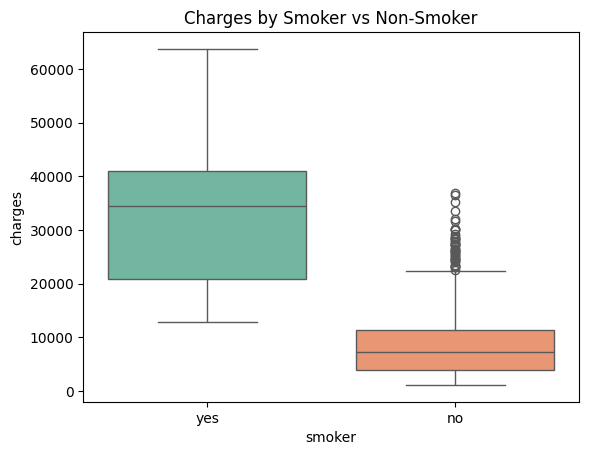

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Boxplot – Charges by Smoker
plt.figure()
sns.boxplot(x="smoker", y="charges", data=df, hue="smoker", legend=False, palette="Set2")
plt.title("Charges by Smoker vs Non-Smoker")
plt.show()

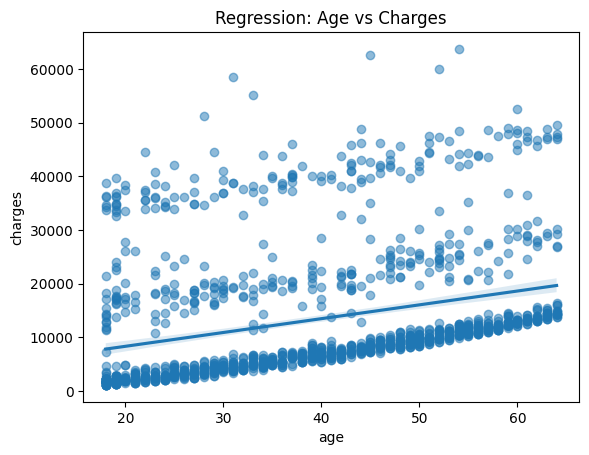

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Regression – Age vs Charges
plt.figure()
sns.regplot(x="age", y="charges", data=df, scatter_kws={'alpha':0.5})
plt.title("Regression: Age vs Charges")
plt.show()

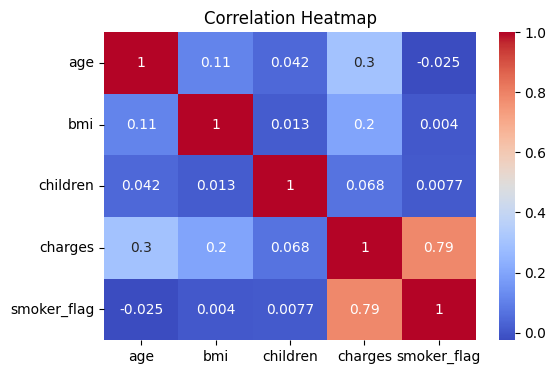

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Heatmap – Correlation
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-2522471981.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="charges", data=region_avg, palette="viridis")


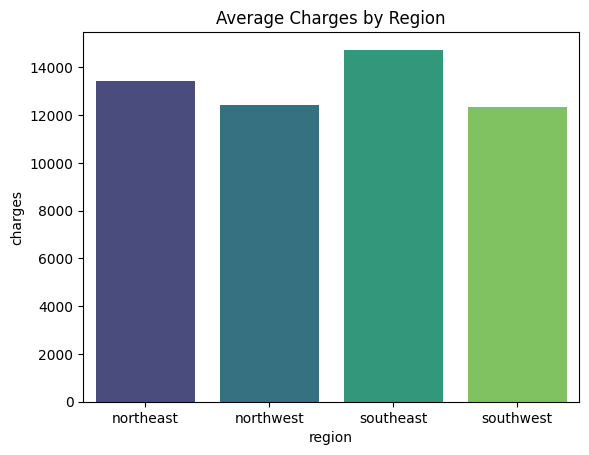

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Bar Chart – Avg Charges by Region
region_avg = df.groupby("region")["charges"].mean().reset_index()
plt.figure()
sns.barplot(x="region", y="charges", data=region_avg, palette="viridis")
plt.title("Average Charges by Region")
plt.show()

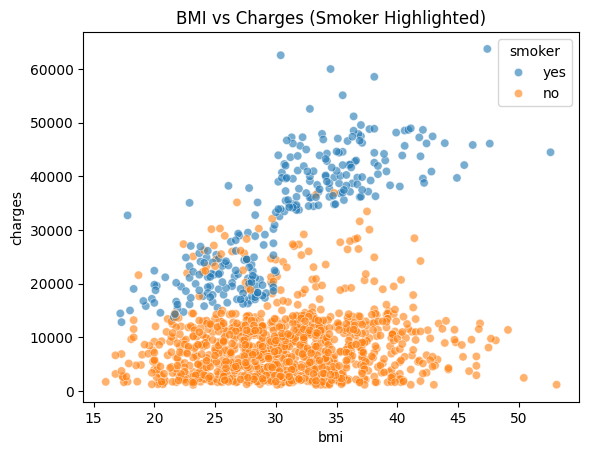

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Scatter – BMI vs Charges
plt.figure()
sns.scatterplot(x="bmi", y="charges", data=df, hue="smoker", alpha=0.6)
plt.title("BMI vs Charges (Smoker Highlighted)")
plt.show()